A short introduction to fast SPT modeling
-----------------------------------------

This notebook presents a short introduction to the modeling of fast single particle tracking datasets. 
The methodology, together with examples of biological relevance, can be found at:

> Hansen, Anders S., Iryna Pustova, Claudia Cattoglio, Robert Tjian, and Xavier Darzacq. “CTCF and Cohesin Regulate Chromatin Loop Stability with Distinct Dynamics.” bioRxiv, 2016, 093476.

This package includes several sample datasets, that will be used by this notebook. Make sure that they can be found by Python.

## 1. Loading of a dataset

To help us with basic and repeated tasks such as dataset loading, we created a small library, `fastSPT_tools` that contain several helper functions that we will use all across this tutorial. We thus need to import it by typing `import fastSPT_tools`.

One of the functions list the available datasets: `list_sample_datasets(path)`. Let's first see what datasets we can get. Then, we will use the `load_dataset(path, dataset_id, cells)` function to load the relevant dataset. This latter function can either load one single cell or a series of cells (identified by their id).

In [1]:
import sys
from tqdm.autonotebook import tqdm
sys.version

#sys.path.append(r'C:\Users\andre\Documents\Spot-On-cli')

C:\Users\andre\Programs\Miniconda\envs\spoton\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
import lmfit

import fastspt as fs
from fastspt import fit, tools, plot, readers, matimport, tracklen
%load_ext autoreload

%autoreload 2

print("Using fastspt version {}".format(fs.__version__))

Using fastspt version 16.1g


In [3]:
import os
os.getcwd()

'Z:\\Andrey\\data\\2019\\0403-RAMM-e-coli-pbp2-PAmCherry-TLK130\\100x_1.49NA\\0403_OD0.1\\FOV5\\movie_continuos_exp_60ms_561_50W_405_12.5mW_1'

In [67]:
from glob import glob

In [70]:
data_paths = glob('z:/Andrey/fromGizem/2019-04-18-PBP2-tracks/*.mat')

In [71]:
data_paths

['z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\A22inliq30forAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\deltaPBP1aforAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\PBP2OverExpforAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\RodZdepl12hforAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\RodZforAndrey.mat',
 'z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\\WTforAndrey.mat']

In [91]:
data_path = data_paths[4]
print(data_path)

z:/Andrey/fromGizem/2019-04-18-PBP2-tracks\RodZforAndrey.mat


In [92]:
all_exp = matimport.read_gizem_mat(data_path)
#cell4 = matimport.concat_all(all_exp, exposure_ms=60., pixel_size_um=0.075)
reps = matimport.concat_reps(all_exp, exposure_ms=60., pixel_size_um=0.075)

discovered 3 replicates containing [7, 8, 7] acquisitions
Assembling tracks with minimal length 3, using exposure 60.0 ms and px size 0.075 µm


453  tracks 
336  tracks 
130  tracks 
326  tracks 
264  tracks 
259  tracks 
419  tracks 
Replicate 1: Total 2187 tracks


395  tracks 
294  tracks 
272  tracks 
219  tracks 
212  tracks 
244  tracks 
265  tracks 
101  tracks 
Replicate 2: Total 2002 tracks


175  tracks 
251  tracks 
200  tracks 
226  tracks 
72  tracks 
45  tracks 
186  tracks 
Replicate 3: Total 1155 tracks



# 2. Track lengths analysis

2187 tracks, 16035 localizations
15 15
(15,) (15,)


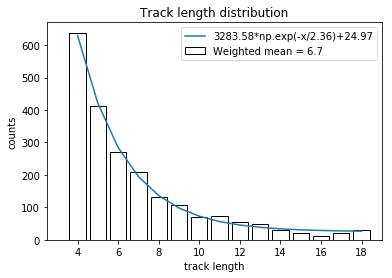

2002 tracks, 15547 localizations
15 15
(15,) (15,)


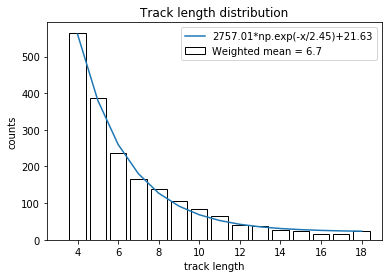

1155 tracks, 8390 localizations
15 15
(15,) (15,)


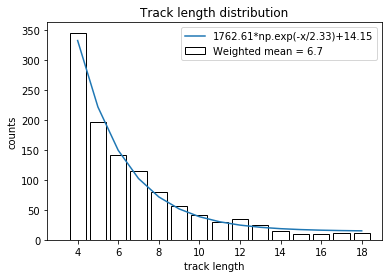

In [93]:
for rep in reps:
    tracklen.get_track_lengths_dist(rep)

## 3. Fitting of the jump lengths distribution to the model (2 states)


Number of frames: 1000.0, number of localizations: 16035
Computation of jump lengths performed in 1.42s
Improved fit on iteration 1
Improved error is 1.7223677340508982e-05
Name        Value      Min      Max   Stderr
D_bound      0.02        0     0.02     None
D_free      0.001    0.001        1     None
F_bound     0.734        0        1     None
sigma     0.01606    0.005      0.1     None
None
Improved fit on iteration 2
Improved error is 4.284066306980843e-06
Name        Value      Min      Max   Stderr
D_bound  8.544e-05        0     0.02 4.065e-05
D_free    0.03013    0.001        1 0.0003254
F_bound    0.3129        0        1 0.002971
sigma     0.02148    0.005      0.1 0.0002605
None
Iteration 3 did not yield an improved fit


<Figure size 1296x576 with 0 Axes>

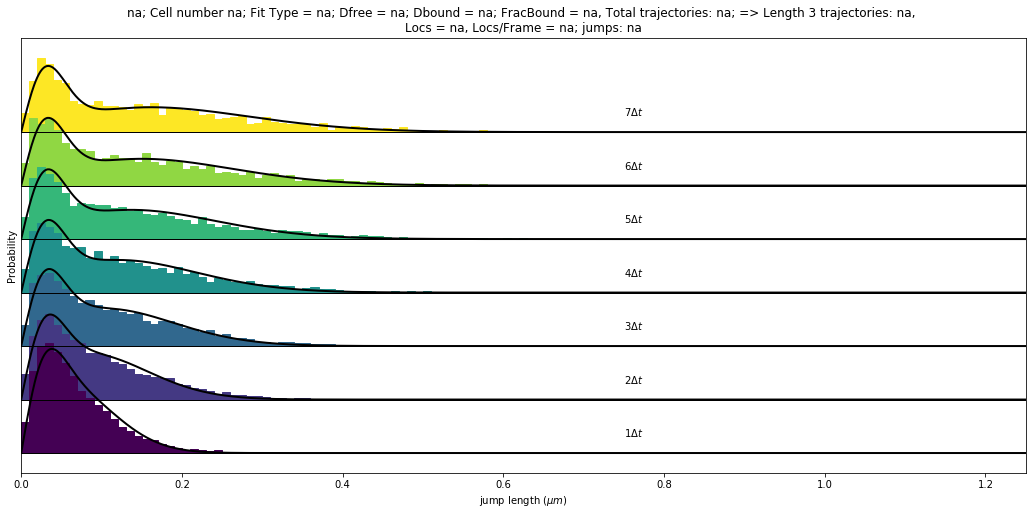

Number of frames: 1000.0, number of localizations: 15547
Computation of jump lengths performed in 1.41s
Improved fit on iteration 1
Improved error is 4.306596949844773e-06
Name        Value      Min      Max   Stderr
D_bound  5.551e-18        0     0.02     None
D_free    0.04305    0.001        1     None
F_bound    0.3611        0        1     None
sigma     0.02166    0.005      0.1     None
None
Improved fit on iteration 2
Improved error is 4.306596949844753e-06
Name        Value      Min      Max   Stderr
D_bound         0        0     0.02     None
D_free    0.04305    0.001        1     None
F_bound    0.3611        0        1     None
sigma     0.02166    0.005      0.1     None
None
Iteration 3 did not yield an improved fit


<Figure size 1296x576 with 0 Axes>

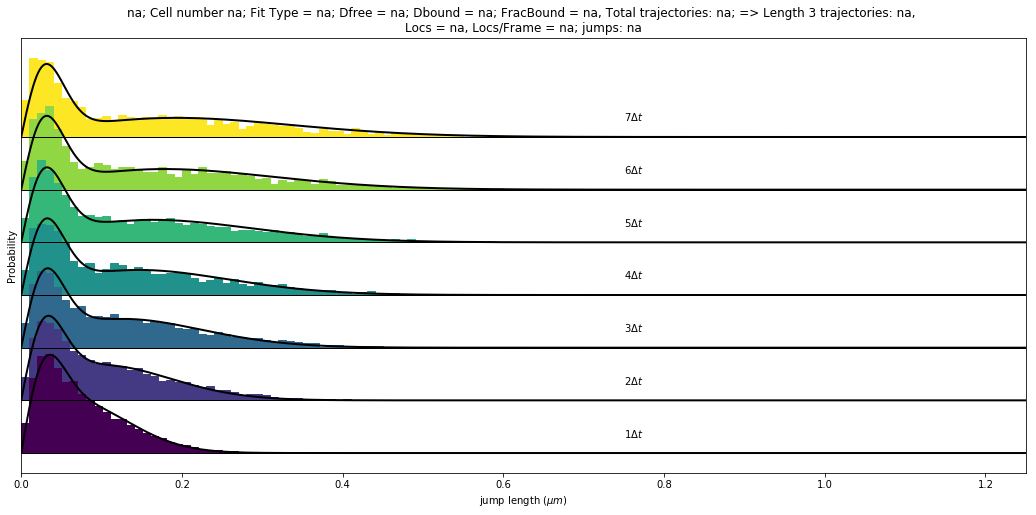

Number of frames: 1000.0, number of localizations: 8390
Computation of jump lengths performed in 1.20s
Improved fit on iteration 1
Improved error is 5.9436611903185864e-06
Name        Value      Min      Max   Stderr
D_bound         0        0     0.02     None
D_free    0.03541    0.001        1     None
F_bound    0.3128        0        1     None
sigma     0.02084    0.005      0.1     None
None
Improved fit on iteration 2
Improved error is 5.943661190318494e-06
Name        Value      Min      Max   Stderr
D_bound         0        0     0.02     None
D_free    0.03541    0.001        1     None
F_bound    0.3128        0        1     None
sigma     0.02084    0.005      0.1     None
None
Improved fit on iteration 3
Improved error is 5.943661190318491e-06
Name        Value      Min      Max   Stderr
D_bound  1.11e-18        0     0.02     None
D_free    0.03541    0.001        1     None
F_bound    0.3128        0        1     None
sigma     0.02084    0.005      0.1     None
None


<Figure size 1296x576 with 0 Axes>

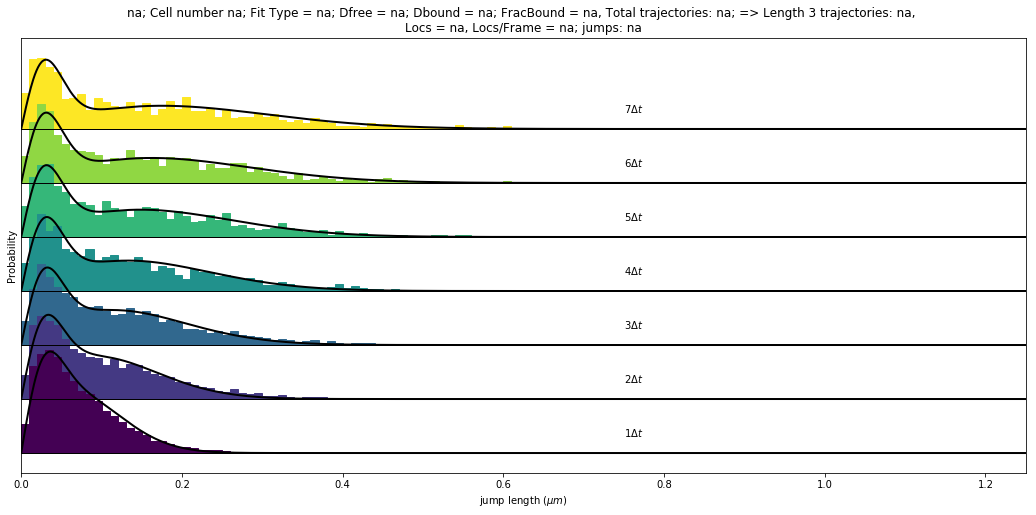

In [94]:
## Generate a dictionary of parameters
fit_params = dict(states=2,
                 iterations=3,
                 CDF=False,
                 CDF1 = True,
                 Frac_Bound = [0, 1],
                 D_Free = [0.001, 1],
                 D_Med = [0.001, 0.1],
                 D_Bound = [0.0, 0.02],
                 sigma_bound = [0.005, 0.1],
                 dT=0.06,
                 dZ=0.7,
                 fitSigma=True,
                 a=0.15716,
                 b=0.20811,
                 useZcorr=False ) 


def my_fit(rep):
    
    cell_spt = readers.to_fastSPT(rep, from_json=False)
    fit_result = tools.auto_fit(cell_spt,
                                fit_params=fit_params,
                                plot_hist=False,
                                plot_result=True)
    return fit_result

reps_fits = list(map(my_fit, reps))


In [95]:
#get stats
fit_stats = pd.DataFrame(columns=fit_result.best_values.keys())

for i, fit_result in enumerate(reps_fits):
    fit_stats.loc[f'rep {i+1}'] = list(fit_result.best_values.values())

fit_stats.loc['mean'] = fit_stats.mean(axis=0)
fit_stats.loc['std'] = fit_stats.std(axis=0)

fit_stats.to_json(data_path + '.stats.json')

fit_stats
#fit_stats.to_excel(path_oe + '.stats.xls')

,D_free,D_bound,F_bound,sigma
rep 1,0.030133,8.544211e-05,0.312868,0.021483
rep 2,0.043053,1.110223e-18,0.361111,0.021662
rep 3,0.035410,1.110223e-18,0.312797,0.020839
mean,0.036199,2.848070e-05,0.328925,0.021328
std,0.005304,4.027780e-05,0.022759,0.000354


In [65]:
pd.read_json(r"Z:/Andrey/fromGizem/2019-04-18-PBP2-tracks/PBP2OverExpforAndrey.mat.stats.json",)

,D_free,D_bound,F_bound,sigma
mean,0.026175,0.000909,0.188440,0.019116
rep 1,0.025672,0.001079,0.204459,0.018927
rep 2,0.027295,0.000800,0.168584,0.019812
rep 3,0.025559,0.000846,0.192279,0.018609
std,0.000793,0.000122,0.014895,0.000509
